In [1]:
%matplotlib widget
from CG import *

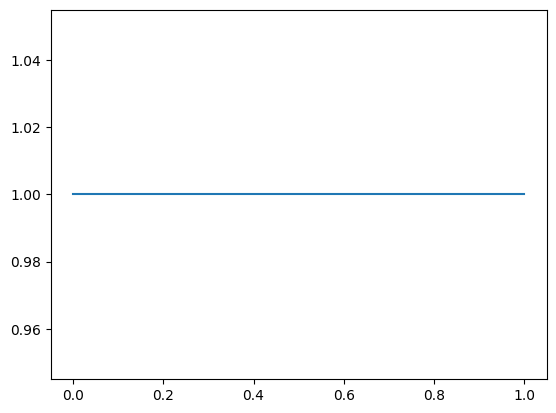

In [3]:
import matplotlib.pyplot as plt

x = [1, 1]
plt.plot(x)
plt.show()

In [2]:
%matplotlib inline
A = np.matrix([[3.0, 2.0], [2.0, 6.0]])
b = np.matrix([[2.0], [-8.0]])
c = 0.0

## 6. Convergence Analysis of Steepest Descent <a id="6"></a>

### 6.1. Instant Results <a id="6.1"></a>

To understand the convergence of Steepest Descent, let’s first consider the case where $e_{[i]}$ is an eigenvector with eigenvalue $\lambda_e$. Then, the residual $r_{[i]} = -Ae_{[i]} = -\lambda_e e_{[i]}$ is also an eigenvector. Equations 11 and 12 give

\begin{align*}
\alpha_{[i]} &= \frac{r_{[i]}^Tr_{[i]}}{r_{[i]}^TAr_{[i]}}, \tag{11} \\
x_{[i+1]} &= x_{[i]} + \alpha_{[i]}r_{[i]}. \tag{12} \\
x + e_{[i+1]} &= x + e_{[i]} + \frac{r^T_{[i]}r_{[i]}}{r^T_{[i]}Ar_{[i]}}r_{[i]}\\
e_{[i+1]} &= e_{[i]} + \frac{r^T_{[i]}r_{[i]}}{\lambda_e r^T_{[i]}r_{[i]}}(-\lambda_e e_{[i]})\\
&= 0.
\end{align*}

Figure 14 demonstrates why it takes only one step to converge to the exact solution. The point lies on one of the axes of the ellipsoid, and so the residual points directly to the center of the ellipsoid. Choosing $\alpha_{[i]}=\lambda^{-1}_e$ gives us instant convergence.

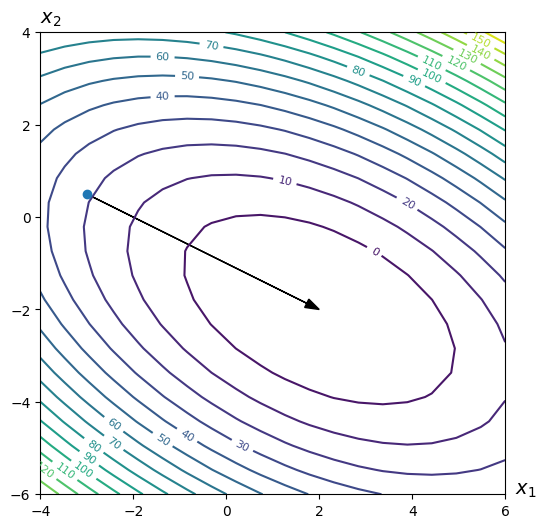

In [5]:
fig14()

<center>Figure 14: Steepest Descent converges to the exact solution on the first iteration if the error term is an eigenvector.</center>

For a more general analysis, we must express $e_{[i]}$ as a linear combination of eigenvectors, and we shall furthermore require these eigenvectors to be orthonormal. It is proven in Appendix C2 that if $A$ is symmetric, there exists a set of $n$ orthogonal eigenvectors of $A$. As we can scale eigenvectors arbitrarily, let us choose so that each eigenvector is of unit length. This choice gives us the useful property that

\begin{equation}
v^T_j v_k = \begin{cases} 1, & j=k,\\ 0, & j \neq k.\end{cases} \tag{17}
\end{equation}

Express the error term as a linear combination of eigenvectors

\begin{equation}
e_{[i]} = \sum^n_{j=1}\xi_j v_j, \tag{18}
\end{equation}

where $\xi_j$ is the length of each component of $e_{[i]}$. From Equations 17 and 18 we have the following identities:

\begin{align*}
r_{[i]} &= -Ae_{[i]} = -\sum_j \xi_j \lambda_j v_j, \tag{19} \\
\|e_{[i]}\|^2 = e^T_{[i]}e_{[i]} &= \sum_j\xi^2_j, \tag{20} \\
e^T_{[i]}Ae_{[i]} &= (\sum_j \xi_j v^T_j)(\sum_j \xi_j \lambda_j v_j) \\
&= \sum_j \xi^2_j \lambda_j, \tag{21}\\
\|r_{[i]}\|^2 = r^T_{[i]}r_{[i]} &= \sum_j \xi^2_j \lambda^2_j, \tag{22}\\
r^T_{[i]}Ar_{[i]} &= \sum_j \xi^2_j \lambda^3_j. \tag{23}
\end{align*}

Equation 19 shows that $r_{[i]}$ too can be expressed as a sum of eigenvector components, and the length of these components are $-\xi_j \lambda_j$. Equations 20 and 22 are just Pythagoras’ Law.

Now we can proceed with the analysis. Equation 12 gives

\begin{align*}
e_{[i+1]} &= e_{[i]} + \frac{r^T_{[i]}r_{[i]}}{r^T_{[i]}Ar_{[i]}}r_{[i]} \\
&= e_{[i]} + \frac{\sum_j \xi^2_j \lambda^2_j}{\sum_j \xi^2_j \lambda^3_j}r_{[i]} \tag{24}
\end{align*}

We saw in the last example that, if $e_{[i]}$ has only one eigenvector component, then convergence is achieved in one step by choosing $\alpha_{[i]} = \lambda^{-1}_e$. Now let’s examine the case where $e_{[i]}$ is arbitrary, but all the eigenvectors have a common eigenvalue $\lambda$. Equation 24 becomes

\begin{align*}
e_{[i+1]} &= e_{[i]} + \frac{\lambda^2 \sum_j \xi^2_j}{\lambda^3 \sum_j \xi^2_j}(\lambda e_{[i]})\\
&= 0
\end{align*}

Figure 15 demonstrates why, once again, there is instant convergence. Because all the eigenvalues are equal, the ellipsoid is spherical; hence, no matter what point we start at, the residual must point to the center of the sphere. As before, choose $\alpha_{[i]} = \lambda^{-1}$.

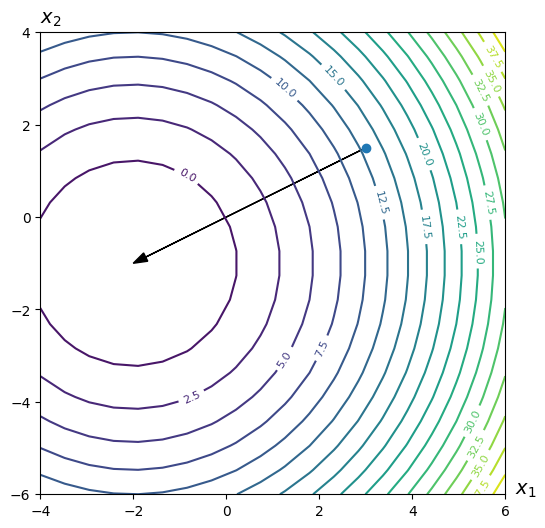

In [17]:
fig15()

<center>Figure 15: Steepest Descent converges to the exact solution on the first iteration if the eigenvalues are all equal</center>

However, if there are several unequal, nonzero eigenvalues, then no choice of $\alpha_{[i]}$ will eliminate all the eigenvector components, and our choice becomes a sort of compromise. In fact, the fraction in Equation 24 is best thought of as a weighted average of the values of $\lambda^{-1}_j$. The weights $\xi^2_j$ ensure that longer components of $e_{[i]}$ are given precedence. As a result, on any given iteration, some of the shorter components of $e_{[i]}$ might actually *increase* in length (though never for long). For this reason, the methods of Steepest Descent and Conjugate Gradients are called *roughers*. By contrast, the Jacobi Method is a *smoother*, because every eigenvector component is reduced on every iteration. Steepest Descent and Conjugate Gradients are not smoothers, although they are often erroneously identified as such in the mathematical literature.

### 6.2. General Convergence <a id="6.2"></a>

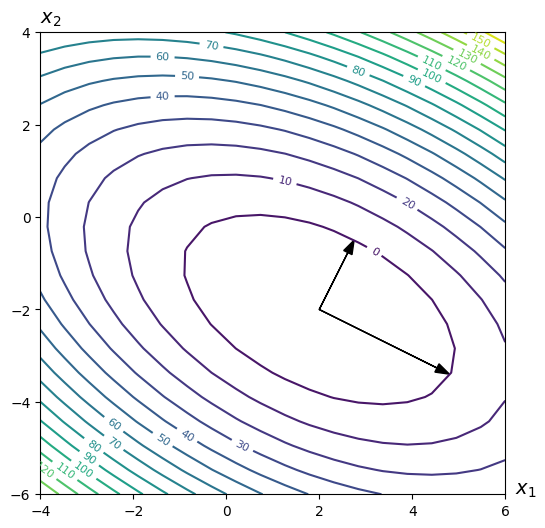

In [18]:
fig16()

<center>Figure 16: The energy norm of these two vectors is equal.</center>

To bound the convergence of Steepest Descent in the general case, we shall define the *energy norm* $\|e\|_A = (e^TAe)^{1/2}$ (see Figure 16). This norm is easier to work with than the Euclidean norm, and is in some sense a more natural norm; examination of Equation 8 shows that minimizing $\|e_{[i]}\|_A$ is equivalent to minimizing $f(x_{[i]})$. With this norm, we have

\begin{align*}
\|e_{[i+1]}\|^2_A &= e^T_{[i+1]}Ae_{[i+1]} \\
&= (e^T_{[i]} + \alpha_{[i]}r^T_{[i]}) A (e_{[i]} + \alpha_{[i]}r_{[i]}) \qquad & \text{(by Equation 12)}\\
&= e^T_{[i]} A e_{[i]} + 2 \alpha_{[i]} r^T_{[i]} A e_{[i]} + \alpha^2_{[i]} r^T_{[i]} A r_{[i]} \qquad & \text{(by symmetry of A)}\\
&= \|e_{[i]}\|^2_A + 2 \frac{r^T_{[i]} r_{[i]}}{r^T_{[i]} A r_{[i]}} (-r^T_{[i]} r_{[i]}) + \left(\frac{r^T_{[i]} r_{[i]}}{r^T_{[i]} A r_{[i]}}\right)^2 r^T_{[i]} A r_{[i]}\\
&= \|e_{[i]}\|^2_A - \frac{(r^T_{[i]} r_{[i]})^2}{r^T_{[i]} A r_{[i]}} \\
&= \|e_{[i]}\|^2_A \left(1 - \frac{(r^T_{[i]} r_{[i]})^2}{(r^T_{[i]} A r_{[i]})(e^T_{[i]} A e_{[i]})}\right) \\
&= \|e_{[i]}\|^2_A \left(1 - \frac{(\sum_j \xi^2_j \lambda^2_j)^2}{(\sum_j \xi^2_j \lambda^3_j)(\sum_j \xi^2_j \lambda_j)}\right) \qquad & \text{(by Identities 21, 22, 23)} \\
&= \|e_{[i]}\|^2_A \omega^2, \qquad \omega^2 = 1 - \frac{(\sum_j \xi^2_j \lambda^2_j)^2}{(\sum_j \xi^2_j \lambda^3_j)(\sum_j \xi^2_j \lambda_j)} \tag{25}
\end{align*}

The analysis depends on finding an upper bound for $\omega$. To demonstrate how the weights and eigenvalues affect convergence, I shall derive a result for $n=2$. Assume that $\lambda_1 \geq \lambda_2$. The *spectral condition number* of $A$ is defined to be $\kappa = \lambda_1/\lambda_2 \geq 1$. The *slope* of $e_{[i]}$ (relative to the coordinate system defined by the eigenvectors), which depends on the starting point, is denoted $\mu = \xi_2/\xi_1$. We have

\begin{align*}
\omega^2 &= 1 - \frac{(\xi^2_1 \lambda^2_1 + \xi^2_2 \lambda^2_2)^2}{(\xi^2_1 \lambda^3_1 + \xi^2_2 \lambda^3_2)(\xi^2_1 \lambda_1 + \xi^2_2 \lambda_2)} \\
&= 1 - \frac{(\kappa^2 + \mu^2)^2}{(\kappa + \mu^2)(\kappa^3 + \mu^2)} \tag{26}
\end{align*}

The value of $\omega$, which determines the rate of convergence of Steepest Descent, is graphed as a function of $\mu$ and $\kappa$ in Figure 17. The graph confirms my two examples. If $e_{[0]}$ is an eigenvector, then the slope $\mu$ is zero (or infinite); we see from the graph that $\omega$ is zero, so convergence is instant. If the eigenvalues are equal, then the condition number $\kappa$ is one; again, we see that $\omega$ is zero.

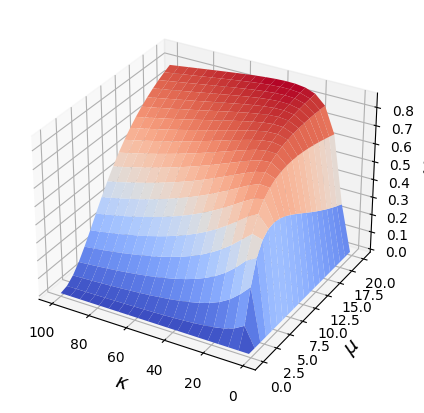

In [6]:
fig17()

<center>Figure 17: Convergence $\omega$ of Steepest Descent as a function of $\mu$ (the slope of $e_{[i]}$) and $\kappa$ (the condition number of $A$). Convergence is fast when $\mu$ or $\kappa$ are small. For a fixed matrix, convergence is worst when $\mu = \pm \kappa$</center>

Figure 18 illustrates examples from near each of the four corners of Figure 17. These quadratic forms are graphed in the coordinate system defined by their eigenvectors. Figures 18(a) and 18(b) are examples with a large condition number. Steepest Descent can converge quickly if a fortunate starting point is chosen (Figure 18(a)), but is usually at its worst when $\kappa$ is large (Figure 18(b)). The latter figure gives us our best intuition for why a large condition number can be bad: $f(x)$ forms a trough, and Steepest Descent bounces back and forth between the sides of the trough while making little progress along its length. In Figures 18(c) and 18(d), the condition number is small, so the quadratic form is nearly spherical, and convergence is quick regardless of the starting point.

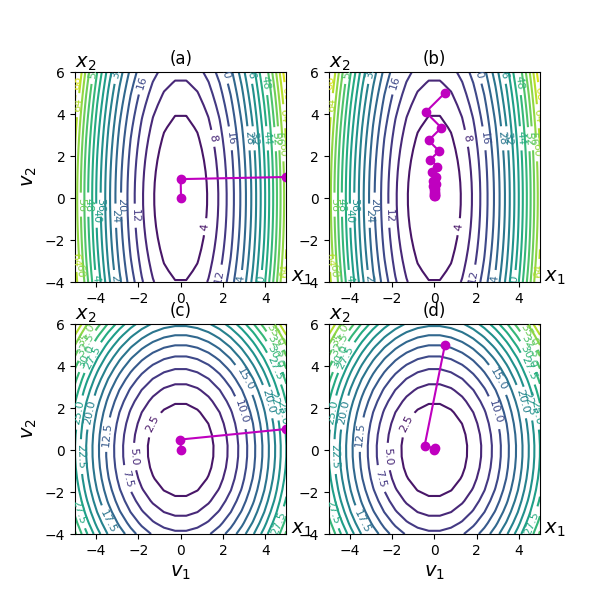

In [7]:
fig18()

<center>Figure 18: These four examples represent points near the corresponding four corners of the graph in Figure 17. (a) Large $\kappa$, small $\mu$. (b) An example of poor convergence. $\kappa$ and $\mu$ are both large. (c) Small $\kappa$ and $\mu$. (d) Small $\kappa$, large $\mu$.</center>

Holding $\kappa$ constant (because $A$ is fixed), a little basic calculus reveals that Equation 26 is maximized when $\mu = \pm \kappa$. In Figure 17, one can see a faint ridge defined by this line. Figure 19 plots worst-case starting points for our sample matrix $A$. These starting points fall on the lines defined by $\xi_2/\xi_1 = \pm \kappa$. An upper bound for $\omega$ (corresponding to the worst-case starting points) is found by setting $\mu^2 = \kappa^2$:

\begin{align*}
\omega^2 &\leq 1 - \frac{4\kappa^4}{\kappa^5 + 2\kappa^4 + \kappa^3} \\
&= \frac{\kappa^5 - 2\kappa^4 + \kappa^3}{\kappa^5 + 2\kappa^4 + \kappa^3} \\
&= \frac{(\kappa - 1)^2}{(\kappa + 1)^2} \\
\omega &\leq \frac{\kappa - 1}{\kappa + 1}. \tag{27} \\
\end{align*}

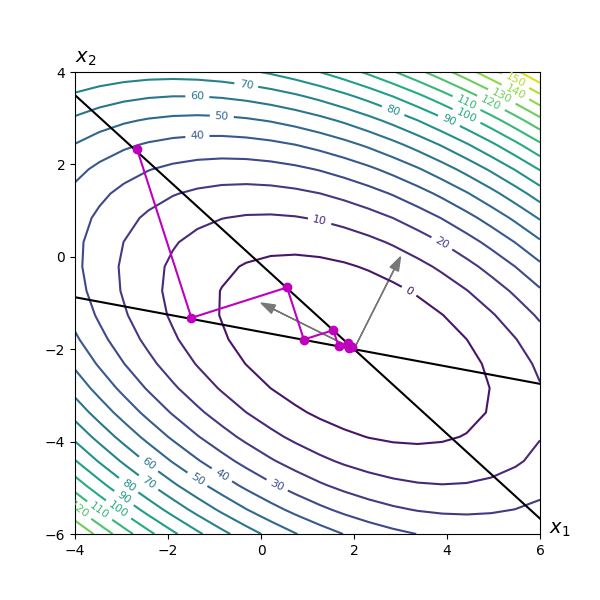

In [8]:
fig19()

<center>Figure 19: Solid lines represent the starting points that give the worst convergence for Steepest Descent. Magenta lines represent steps toward convergence. If the first iteration starts from a worst-case point, so do all succeeding iterations. Each step taken intersects the paraboloid axes (gray arrows) at precisely a 45° angle. Here, $\kappa = 3.5$.</center>

Inequality 27 is plotted in Figure 20. The more *ill-conditioned* the matrix (that is, the larger its condition number $\kappa$), the slower the convergence of Steepest Descent. In Section 9.2, it is proven that Equation 27 is also valid for $n>2$, if the condition number of a symmetric, positive-definite matrix is defined to be 

$$
\kappa = \lambda_{max}/\lambda_{min}
$$

the ratio of the largest to smallest eigenvalue. The convergence results for Steepest Descent are

\begin{align*}
\|e_{i]}\|_A &\leq \left(\frac{\kappa-1}{\kappa+1}\right)^i \| e_{[0]}\|_A, \qquad \text{and} \tag{28} \\
\frac{f(x_{i]}) - f(x)}{f(x_{[0]}) - f(x)} &= \frac{\frac{1}{2} e^t_{i]} A e_{i]}}{\frac{1}{2} e^t_{[0]} A e_{[0]}} \qquad \text{by Equation 8} \\ 
&\leq \left(\frac{\kappa - 1}{\kappa + 1}\right)^{2i}. \tag{29}
\end{align*}

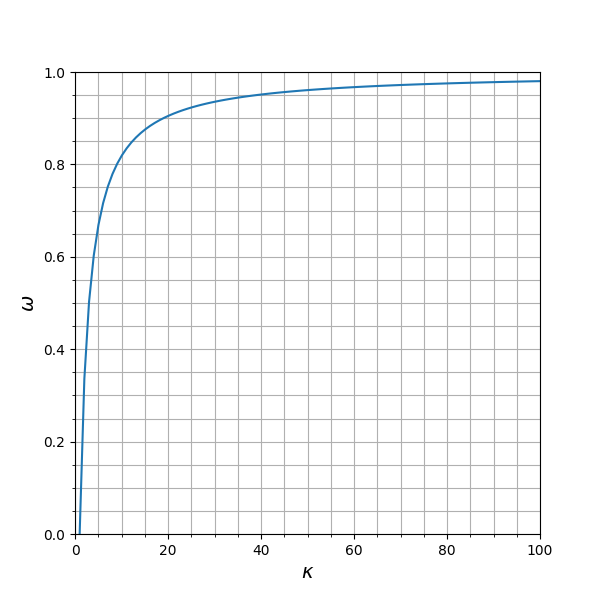

In [9]:
fig20()

<center>Figure 20: Convergence of Steepest Descent (per iteration) worsens as the condition number of the matrix increases.</center>

Next: [7. The Method of Conjugate Directions](CG07.ipynb)